# HW4
## Yidan Wang 2973331278
## PART1 
## Question1

### 1. The LASSO and Boosting for Regression

#### (a) Use the ﬁrst 1495 rows of data as the training set and the rest as the test set.

In [1]:
# load the data and packages
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


attr_list = []
with open("../data/communities.names") as f:
    rawtext = f.readlines()
    for i in rawtext:
        attr = re.findall('@attribute (.*) ',i)
        if attr:
            attr_list.append(attr[0])
            

data1 = pd.read_csv('../data/communities.data', header=None, na_values=["?"], names=attr_list)


# delete the first five non-predictive attribute
data1 = data1.iloc[:, 5:]


# split the train and test set
data1_train = data1.iloc[:1495,:]
data1_test = data1.iloc[1495:,:]

display(data1_train.head())
display(data1_test.head())

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.0,NaN,0.12
1496,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.11
1497,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.0,NaN,0.12
1498,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.0,NaN,0.06
1499,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.0,NaN,0.12


#### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

#### I use IterativeImputer and KNNImputer to do data imputation. However, the result in 1f shows that IterativeImputer is much better than KNN. So I finally choose Iterative.

In [2]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

features_name = data1_train.iloc[:,0:-1].columns.tolist()
imp_iter = IterativeImputer(missing_values=np.nan, random_state = 424, n_nearest_features=5)
imp_iter.fit(data1_train.iloc[:,0:-1])
train_iter_x = imp_iter.transform(data1_train.iloc[:,0:-1])
test_iter_x = imp_iter.transform(data1_test.iloc[:,0:-1])

data_iter_x = np.vstack((train_iter_x, test_iter_x))

imp_knn = KNNImputer(missing_values=np.nan)
imp_knn.fit(data1_train.iloc[:,0:-1])
train_knn_x = imp_knn.transform(data1_train.iloc[:,0:-1])
test_knn_x = imp_knn.transform(data1_test.iloc[:,0:-1])

data_knn_x = np.vstack((train_knn_x, test_knn_x))


df_iter_x = pd.DataFrame(data_iter_x, columns = features_name)
df_knn_x = pd.DataFrame(data_knn_x, columns = features_name)

display(df_iter_x)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.288463,0.02,0.12,0.45,0.020084,-0.012452,0.739966,0.429275,0.00,0.123313
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.278979,0.01,0.21,0.02,0.049153,-0.012923,0.690739,0.462601,0.00,0.156384
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.283361,0.02,0.39,0.28,0.064510,-0.026847,0.614400,0.545350,0.00,0.118618
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.277224,0.04,0.09,0.02,0.005936,-0.015347,0.734135,0.442859,0.00,0.136630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.291242,0.01,0.28,0.05,0.010140,-0.010096,0.716626,0.438783,0.00,0.141433
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.361319,0.02,0.37,0.20,0.038410,-0.001902,0.626196,0.536732,0.00,0.198808
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.250000,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.190000,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000


#### (c) Plot a correlation matrix for the features in the data set.

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.157505,0.713652,0.231897,0.270356,0.823754,0.826457,-0.114080,0.069583,0.466352,0.096606
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,0.174166,-0.015078,-0.004072,-0.051506,-0.090381,-0.061900,-0.155571,0.103024,-0.094368,-0.091457
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,-0.048796,0.149758,0.095053,0.147023,0.321076,0.241386,-0.179423,0.051292,0.260793,0.288187
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.202859,-0.131389,-0.337458,-0.215636,-0.336345,-0.294651,0.231690,-0.119314,-0.276234,-0.304909
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,0.288511,-0.001084,0.389944,0.296921,0.025775,0.117537,-0.003580,0.081452,0.101888,0.006967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PolicOperBudg,0.826457,-0.061900,0.241386,-0.294651,0.117537,0.157226,0.013150,0.112921,0.080341,-0.023350,...,0.135622,0.571212,0.245103,0.260822,0.834007,1.000000,-0.126898,0.018495,0.358174,0.329287
LemasPctPolicOnPatr,-0.114080,-0.155571,-0.179423,0.231690,-0.003580,-0.140958,-0.097505,-0.086545,-0.044515,0.081412,...,-0.041838,-0.098305,0.015863,0.066422,-0.159829,-0.126898,1.000000,-0.040894,-0.046926,-0.262714
LemasGangUnitDeploy,0.069583,0.103024,0.051292,-0.119314,0.081452,0.110941,0.077811,0.065565,0.037910,-0.109924,...,0.129669,0.104208,-0.072186,-0.112293,0.068921,0.018495,-0.040894,1.000000,-0.032610,-0.000730
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.015612,0.299632,0.228084,0.206644,0.375151,0.358174,-0.046926,-0.032610,1.000000,0.194344


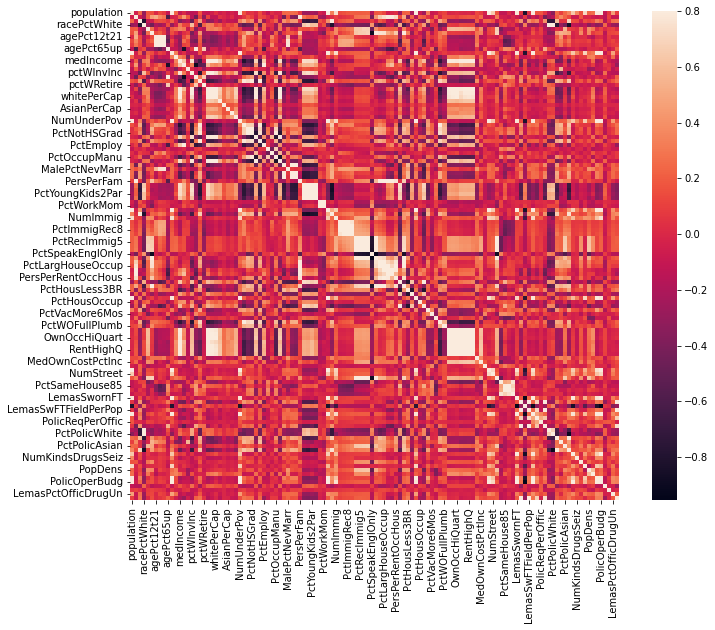

In [3]:
corrmat = df_iter_x.corr()
display(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

#### (d) Calculate the Coeﬃcient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean..

In [4]:
stats = df_iter_x.describe().T[["mean","std"]]
cv_data1 = (stats["std"]/stats["mean"]).sort_values(ascending=False)
display(cv_data1)

LemasSwornFT           10.160734
PolicOperBudg           7.806675
LemasTotalReq           4.801235
NumStreet               4.407702
NumInShelters           3.485481
                         ...    
RacialMatchCommPol      0.210205
PctPolicWhite           0.162221
NumKindsDrugsSeiz       0.159910
LemasPctPolicOnPatr     0.128332
LemasSwFTFieldOps       0.062193
Length: 122, dtype: float64

#### (e) Pick ⌊ √ 128 ⌋ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about signiﬁcance of those features, just by the scatter plots?

#### Answer:
*The features with high CV have high Volatility which means they are useful features to make prediction.*

,LemasSwornFT,PolicOperBudg,LemasTotalReq,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,ViolentCrimesPerPop
0,0.030000,0.040000,0.060000,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.20
1,-0.011611,-0.012452,-0.004604,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.67
2,-0.017634,-0.012923,-0.006580,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.43
3,0.010514,-0.026847,-0.021773,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.12
4,0.007143,-0.015347,-0.015292,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.010736,-0.010096,-0.004944,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.09
1990,-0.001631,-0.001902,0.009283,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.45
1991,0.060000,0.060000,0.040000,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.23
1992,0.020000,0.020000,0.010000,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.19


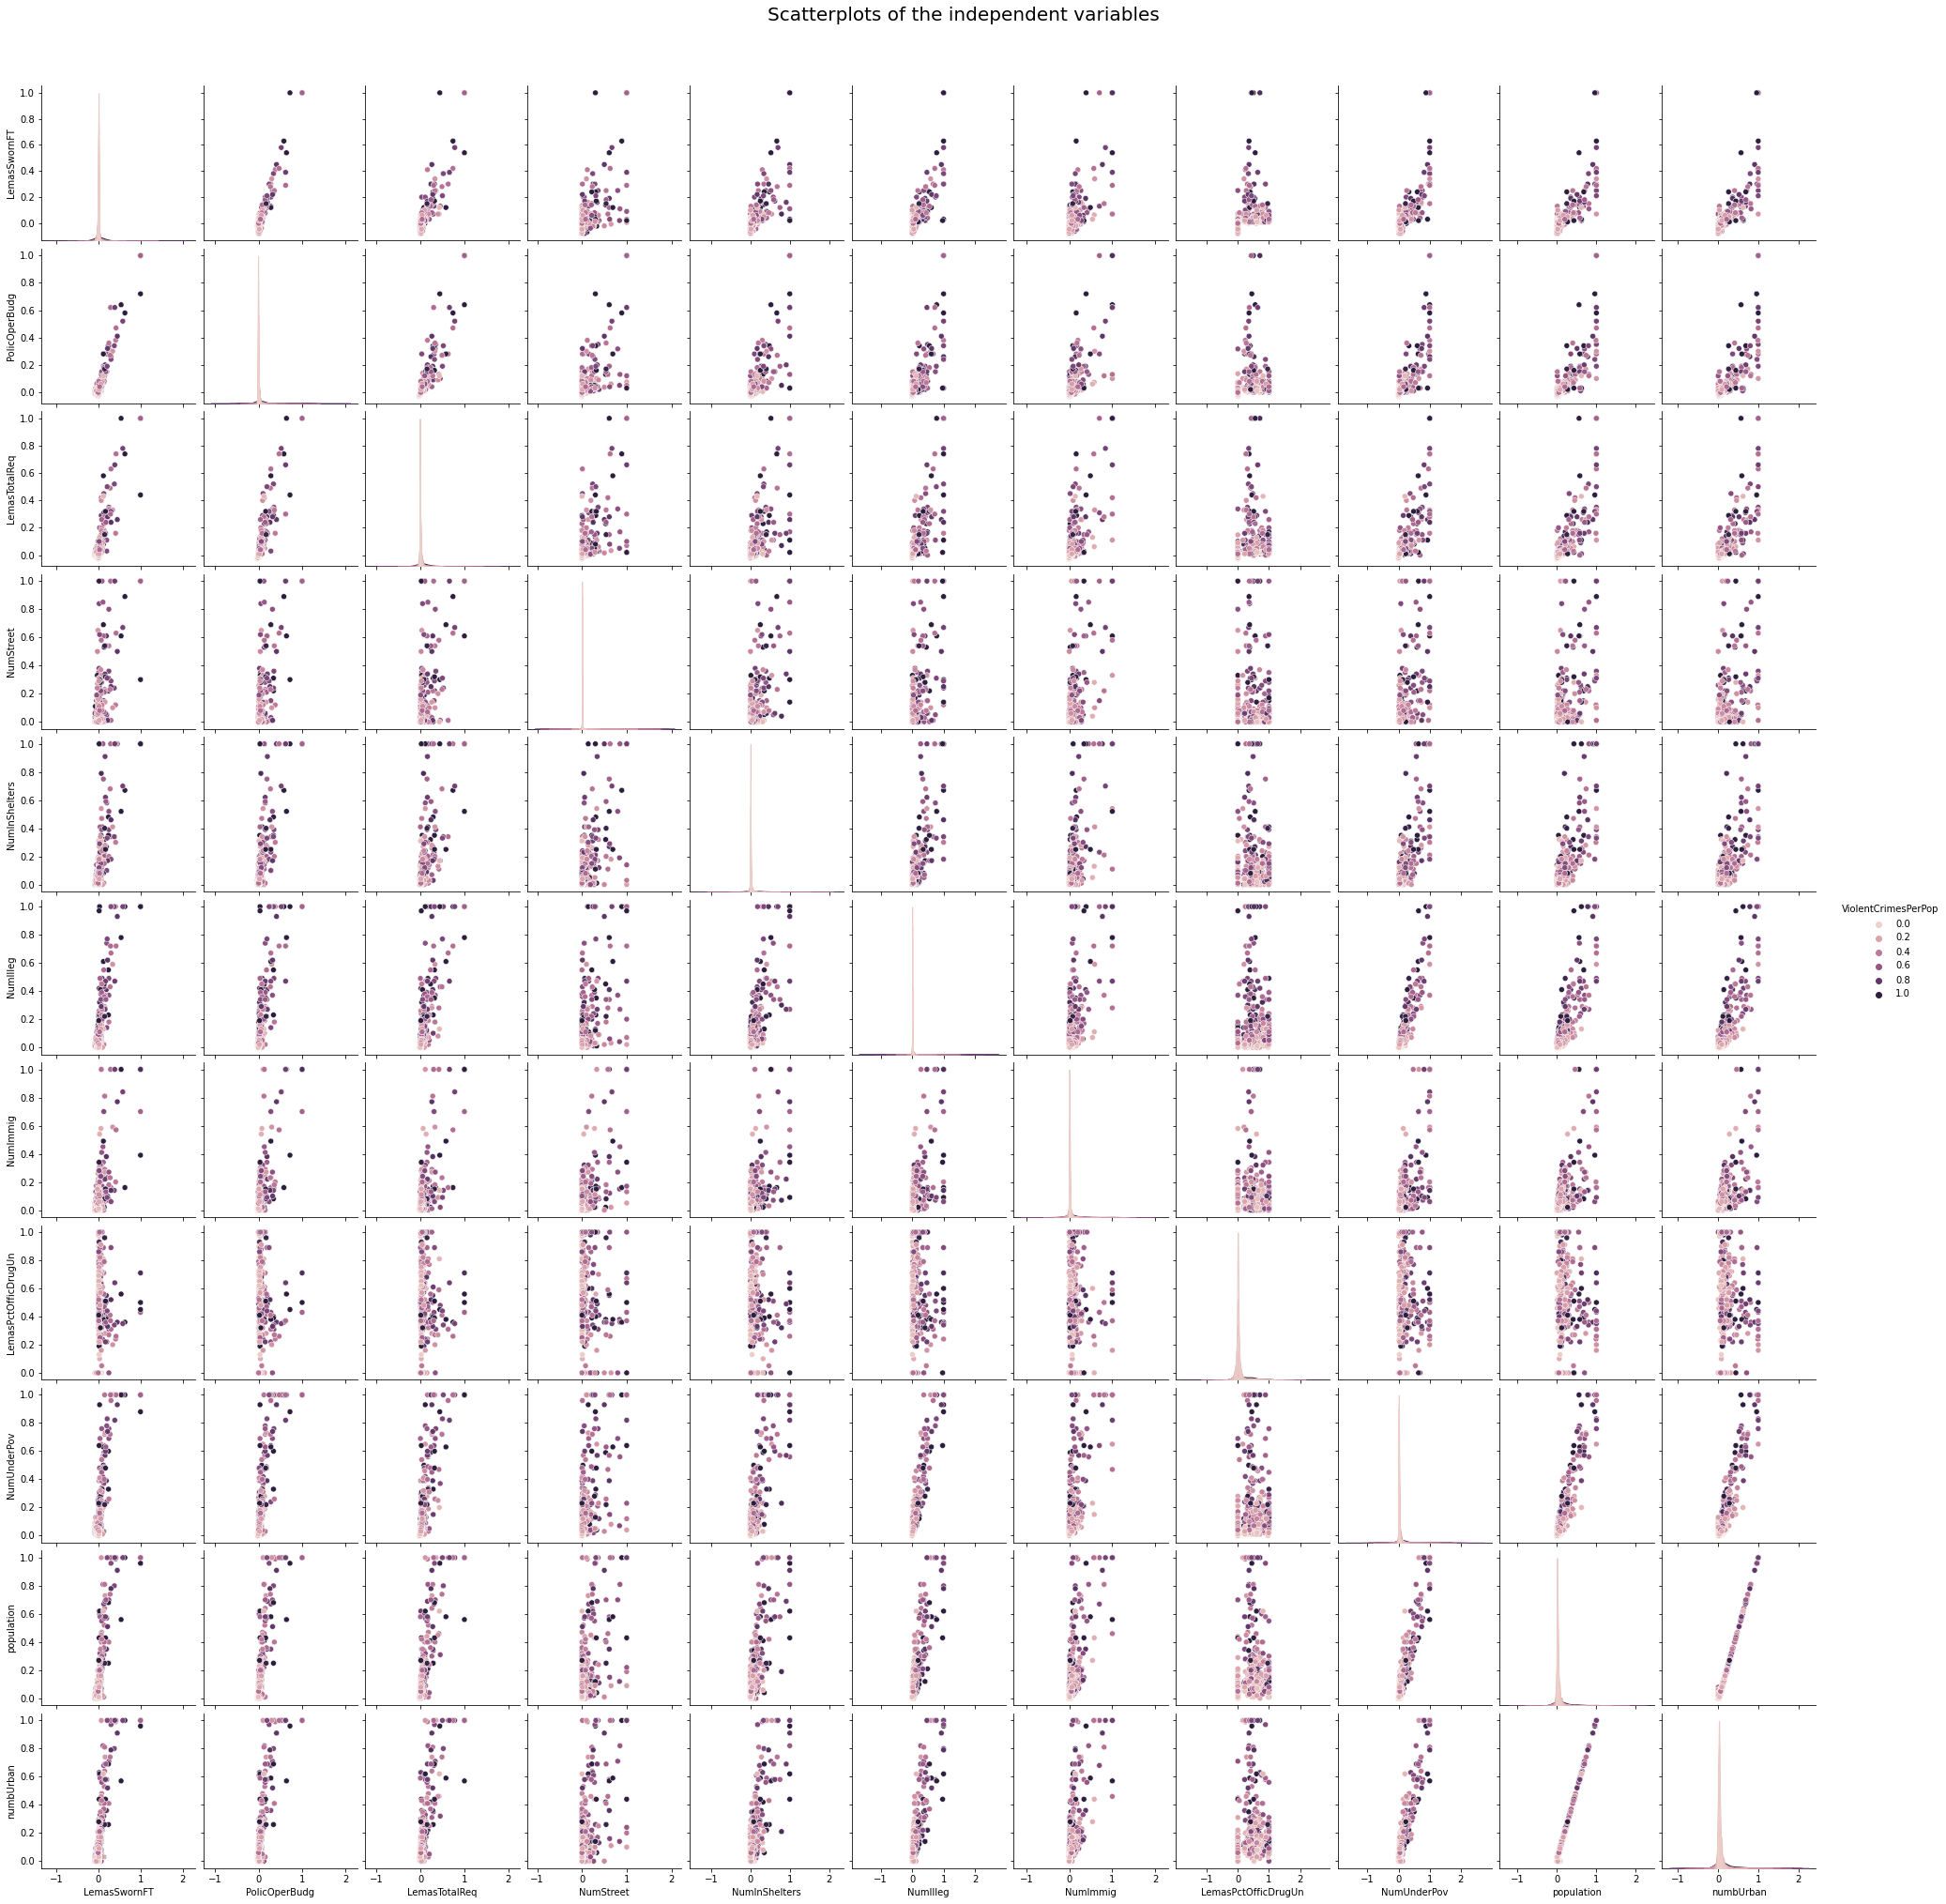

In [7]:
# find the top 11 features.
cv_features_name = cv_data1[:11].index.tolist()
data1e = df_iter_x[cv_features_name]
data1e["ViolentCrimesPerPop"] = data1.iloc[:,-1]

display(data1e)

g1 = sns.pairplot(
    data=data1e, hue="ViolentCrimesPerPop",
    kind="scatter", diag_kind="kde"
)
g1.fig.suptitle("Scatterplots of the independent variables", y=1.03, fontsize=20)
plt.show()

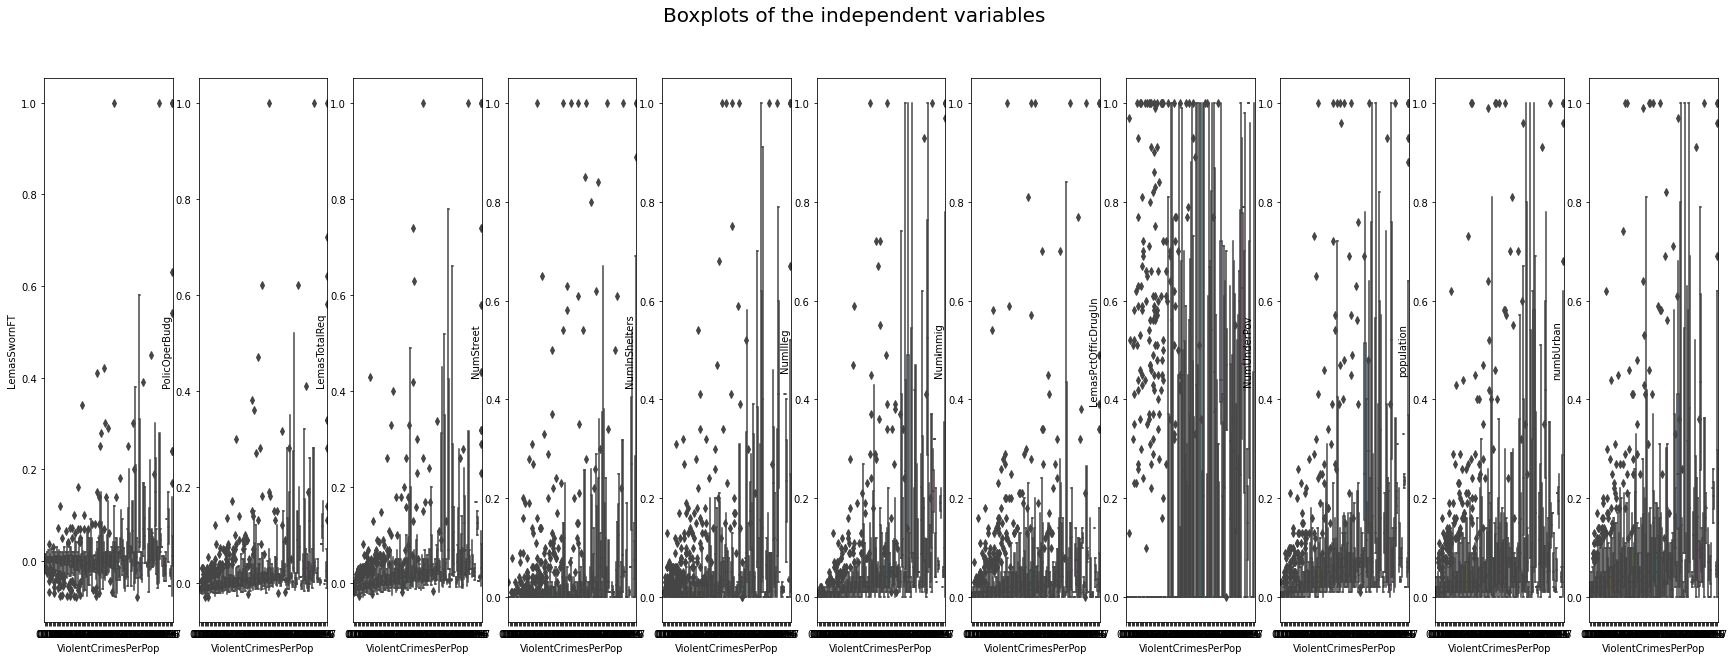

In [8]:
fig, ax =plt.subplots(1,11, figsize=(30,10))
fig.suptitle('Boxplots of the independent variables', fontsize=20)

for name, order in zip(cv_features_name, range(11)):
    sns.boxplot(y=name, x="ViolentCrimesPerPop",
                data=data1e, ax=ax[order]);

#### (f) Fit a linear model using least squares to the training set and report the test error.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

y_train = data1_train.iloc[:,-1] 
y_test = data1_test.iloc[:,-1] 


reg_f = LinearRegression().fit(train_iter_x , y_train)
y_predict_f = reg_f.predict(test_iter_x)

# use mse to calculate the test error
test_error_f = mean_squared_error(y_test,y_predict_f)
print("test error of the linear model is %f2" % test_error_f)
print("R2 of the linear model is %f2" % r2_score(y_test,y_predict_f))


test error of the linear model is 0.0180362
R2 of the linear model is 0.6207372


#### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [12]:

reg_g = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
reg_g.fit(train_iter_x , y_train)   

# print(reg_g.cv_values_)
print("the lambda of ridge is", reg_g.alpha_)


y_predict_g = reg_g.predict(test_iter_x)
test_error_g = mean_squared_error(y_test,y_predict_g)
print("test error of the ridge model is %f2" %test_error_g)
print("R2 of the ridge model is %f2" %r2_score(y_test,y_predict_g))

the lambda of ridge is 1.0
test error of the ridge model is 0.0178372
R2 of the ridge model is 0.6249262


#### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.

#### Answer:
#### the test error is better if no standardize the features. (0.0178212 vs 0.0356002)

alpha of lasso is 0.0001162
the list of variables selected is  ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSw

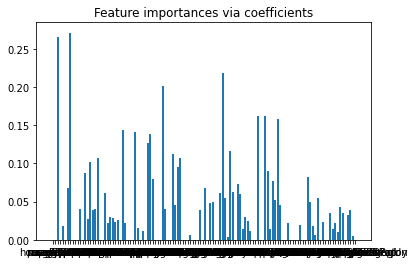

test error of the lasso model is 0.0178212
R2 of the lasso model is 0.6252492


In [42]:
reg_h = linear_model.LassoCV(max_iter=2000)
reg_h.fit(train_iter_x , y_train)   


print("alpha of lasso is %f2" %reg_h.alpha_)


not_0_f = np.where(reg_h.coef_ != 0)[0].tolist()

#print(reg_h.n_features_in_)

importance = np.abs(reg_h.coef_)
features_names = df_iter_x.columns
f_df = pd.DataFrame(features_names)
f_df2 = f_df.iloc[not_0_f,:][0].values.tolist()
print("the list of variables selected is ", f_df2)

plt.bar(height=importance, x=features_names.tolist())
plt.title("Feature importances via coefficients")
plt.show()

y_predict_h = reg_h.predict(test_iter_x)
test_error_h = mean_squared_error(y_test,y_predict_h)
print("test error of the lasso model is %f2" %test_error_h)
print("R2 of the lasso model is %f2" %r2_score(y_test,y_predict_h))

alpha of lasso is 0.0006192
the list of variables selected is  ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSw

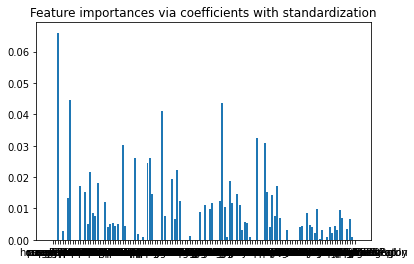

test error of the lasso model with standardized features is 0.0356002
R2 of the lasso model with standardized features is 0.2514002


In [44]:
scaler = StandardScaler()
scaler.fit(train_iter_x)
train_x_h2 = scaler.transform(train_iter_x)
test_x_h2 = scaler.transform(test_iter_x)


reg_h2 = linear_model.LassoCV(max_iter=2000)
reg_h2.fit(train_x_h2 , y_train)   

print("alpha of lasso is %f2" %reg_h2.alpha_)


not_0_f2 = np.where(reg_h2.coef_ != 0)[0].tolist()

#print(reg_h.n_features_in_)

importance2 = np.abs(reg_h2.coef_)
features_names2 = df_iter_x.columns
f_df_2 = pd.DataFrame(features_names2)
f_df2_2 = f_df_2.iloc[not_0_f2,:][0].values.tolist()
print("the list of variables selected is ", f_df2_2)

plt.bar(height=importance2, x=features_names2.tolist())
plt.title("Feature importances via coefficients with standardization")
plt.show()

y_predict_h2 = reg_h2.predict(test_iter_x)
test_error_h2 = mean_squared_error(y_test,y_predict_h2)
print("test error of the lasso model with standardized features is %f2" %test_error_h2)
print("R2 of the lasso model with standardized features is %f2" %r2_score(y_test,y_predict_h2))

#### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

##### we choose 96 and 59 to test the data. 96 is the best, but not 59 is relatively a good choice because its less number than 96 and their slight difference in mse.

In [45]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

n_list = []
mse_i_list = []
r2_i_list = []
for i in range(122):
    pcr = make_pipeline(PCA(n_components=i+1), LinearRegression())
    n_list.append(i+1)
    pcr.fit(train_iter_x, y_train)
    r2_cv = cross_val_score(pcr,train_iter_x, y_train,cv=5, n_jobs=-1, scoring='r2')
    mse_cv = -cross_val_score(pcr,train_iter_x, y_train,cv=5, n_jobs=-1, scoring = 'neg_mean_squared_error')
    r2_i_list.append(r2_cv.mean())
    mse_i_list.append(mse_cv.mean())
    # pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline
    
    
df_i = pd.DataFrame({"N":n_list, "mse of cv": mse_i_list, "r2 of cv": r2_i_list})
df_i.set_index('N',inplace=True)
display(df_i)

,mse of cv,r2 of cv
N,,
1,0.035521,0.371650
2,0.029679,0.474753
3,0.025650,0.546088
4,0.023355,0.586076
5,0.022101,0.608515
...,...,...
118,0.020278,0.641197
119,0.020396,0.639062
120,0.020573,0.635883


In [46]:
df_i2 = df_i.sort_values(by='mse of cv')
display(df_i2.head(50))

,mse of cv,r2 of cv
N,,
96,0.019369,0.657217
91,0.019369,0.657188
95,0.019383,0.656823
97,0.019384,0.656941
87,0.019421,0.656281
92,0.019427,0.656238
90,0.019433,0.656263
88,0.019450,0.655910
93,0.019455,0.655687


In [47]:
for i in [96, 59]:
    pcr = make_pipeline(PCA(n_components=i), LinearRegression()) 
    pcr.fit(train_iter_x, y_train)
    y_predict_i = pcr.predict(test_iter_x)
    test_error_i = mean_squared_error(y_test,y_predict_i)
    r2_i = r2_score(y_test,y_predict_i)
    print("When n is %s, the test error is %s, the r2 score is %s " %(i, test_error_i, r2_i))
 

When n is 96, the test error is 0.01856646855332922, the r2 score is 0.609581511914584 
When n is 59, the test error is 0.01832212291508709, the r2 score is 0.6147196486786513 


#### (j) In this section, we would like to ﬁt a boosting tree to the data. As in classiﬁcation trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1 -penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to ﬁt the model tree. Determine α (the regularization term) using cross-validation.

#### the best α is 1 with test error is 0.0163602

In [48]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV


# first find the best learning rate


param_test1 = {"learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5]}

gsearch1 = GridSearchCV(estimator = XGBRegressor(n_estimators=100, booster='gbtree', random_state=424, reg_alpha=0), 
                        param_grid = param_test1, scoring='neg_mean_squared_error', cv=5)


grid_result1 = gsearch1.fit(train_iter_x, y_train)
print("The best %s with mse is %s " %(grid_result1.best_params_, -grid_result1.best_score_))




The best {'learning_rate': 0.1} with mse is 0.021193208513621838 


In [49]:
# find the best max_depth and lambda1 

param_test2 = {"max_depth": [3,4,5,6], "reg_alpha":[0, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000, 10000, 100000]}
gsearch2 = GridSearchCV(estimator = XGBRegressor(n_estimators=100, learning_rate =0.1, booster='gbtree', random_state=424), 
                        param_grid = param_test2, scoring='neg_mean_squared_error', cv=5)


grid_result2 = gsearch2.fit(train_iter_x, y_train)
print("The best %s with mse is %s " %(grid_result2.best_params_, -grid_result2.best_score_))

The best {'max_depth': 3, 'reg_alpha': 1} with mse is 0.020125964520375288 


In [50]:
# use alpha = 1 

model_j = XGBRegressor(n_estimators=100, max_depth=3, learning_rate =0.3, booster='gbtree', random_state=424, reg_alpha=1)
model_j.fit(train_iter_x, y_train)

y_predict_j = model_j.predict(test_iter_x)
test_error_j = mean_squared_error(y_test,y_predict_j)
print("the test error of L1 -penalized regression with alpha =1 is %f2 "  %test_error_j)
print("the R2 of L1 -penalized regression with alpha =1 is %f2 " %r2_score(y_test,y_predict_j))

the test error of L1 -penalized regression with alpha =1 is 0.0163602 
the R2 of L1 -penalized regression with alpha =1 is 0.6559702 
